In [10]:
import scipy
import scipy.stats
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last_expr" # Default jupyter behavior
InteractiveShell.ast_node_interactivity = "all" # All expressions are shown.

covar


array([[ 1.0969172 , -0.39004911],
       [-0.39004911,  0.416943  ]])

multivariate_normal_x


array([[-0.60852732,  0.28813711]])

px


array([[0.28061255, 0.67228522]])

pz*(1-pz)


array([0.09  , 0.0475])

vx


array([[ 4., 23.]])

array([[0.28061255, 0.67228522]])

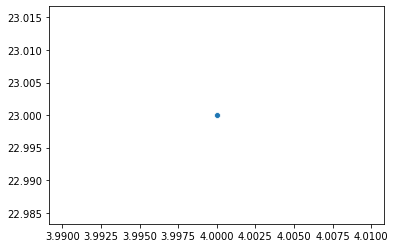

In [162]:
K = 2
means = np.array((10.0,20.0))
####

# Generating covariance matrix with inverse Wishart distribution. What does that parameter do?
covar = scipy.stats.invwishart(K,np.ones(K)).rvs(size=1)

# Sampling X from a multivariate normal with the covariance from Wishart.
# It's the demand for each commodity at each sample
multivariate_normal_x = np.random.multivariate_normal(np.zeros(means.shape), covar,size=1)

# Extract the probability density of the sampled values. Is the sqrt(diag(covar)) arbitrary?
px = scipy.stats.norm(0,np.sqrt(np.diagonal(covar))).cdf(multivariate_normal_x)


pz = 1/means
vx = scipy.stats.geom(p=pz*(1-pz)).ppf(px)

print("covar")
covar
print("multivariate_normal_x")
multivariate_normal_x
print("px")
px
print("pz*(1-pz)")
pz*(1-pz)
print("vx")
vx
px
sns.scatterplot(vx[:,0],vx[:,1])

In [168]:
scipy.stats.invwishart(K,np.ones(K)).rvs(size=10).shape

(10, 2, 2)

In [101]:
px.shape[0]
px[0,:]
pz
r = scipy.stats.geom(p=pz*(1-pz)).ppf(px)
import seaborn as sns
#sns.scatterplot(r[:,0],r[:,1])# not how i want it.
r

10000

array([0.0315921 , 0.06039235])

array([0.1 , 0.05])

array([[1., 2.],
       [3., 7.],
       [4., 3.],
       ...,
       [4., 9.],
       [3., 5.],
       [4., 9.]])

array([[ 8., 12.],
       [ 8.,  4.],
       [ 6., 12.],
       [ 2.,  7.],
       [ 5.,  3.],
       [ 8., 14.],
       [ 6.,  5.],
       [ 2.,  9.],
       [ 2., 14.],
       [ 1.,  7.]])